<a href="https://colab.research.google.com/github/jamissonfreitas/IN1167/blob/master/Cap1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capítulo 1 e 2 - Atividade

In [0]:
import pandas as pd
import io
import requests
# lib to plot the data
import matplotlib.pyplot as plt
# lib to use the decompositio in the time series
from statsmodels.tsa.seasonal import seasonal_decompose
# lib to use the acf and pcf correlations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# lib to organize the data in data frame
from pandas import DataFrame
# lib to organize the time series by periods
from pandas import TimeGrouper

**1. Bases selecionadas** de https://github.com/FinYang/tsdl/tree/master/data-raw

*   Com sazonalidade
*   Com tendência determinística
*   Série financeira ou climática



## Temperature

In [90]:
url='https://raw.githubusercontent.com/FinYang/tsdl/master/data-raw/monthly/tpmon.dat'
data = requests.get(url).content
data = data.decode('utf-8').split('\n')[1:]
data = [' '.join(d.strip().split()) for d in data]
data = ' '.join(data)
data = data.split(' ')
len(data)

2977

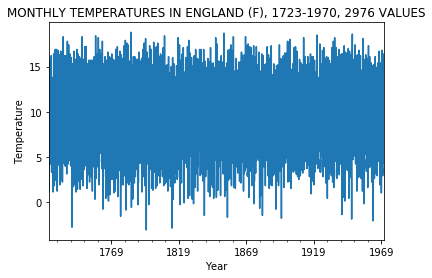

In [97]:
series = pd.Series(
    data[:-1], 
    index=pd.date_range(start ='1-1-1723', end ='1-1-1971', freq ='M') 
)
series = series.astype(float)
series.plot()
plt.title('MONTHLY TEMPERATURES IN ENGLAND (F), 1723-1970, 2976 VALUES')
plt.ylabel('Temperature')
plt.xlabel('Year')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """Entry point for launching an IPython kernel.


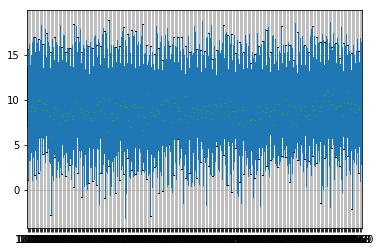

<Figure size 720x1440 with 0 Axes>

In [105]:
# to plot by year
groups = series.groupby(TimeGrouper('A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.boxplot()
plt.figure(figsize=(10,20))
plt.show()

In [0]:
#df.boxplot()

## Gold Serie

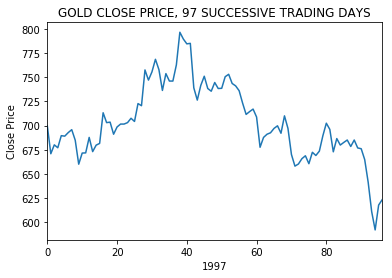

In [0]:
url='https://raw.githubusercontent.com/FinYang/tsdl/master/data-raw/commod/gold.dat'
s = requests.get(url).content
data = ' '.join([l.strip() for l in s.decode('utf-8').split('\n')[1:]])
s1 = pd.Series(data.split(' '))
s1 = s1.astype(float)
plt.xlabel('1997')
plt.ylabel('Close Price')
plt.title('GOLD CLOSE PRICE, 97 SUCCESSIVE TRADING DAYS')
s1.plot()

### Auto-Correlation Function (ACF)

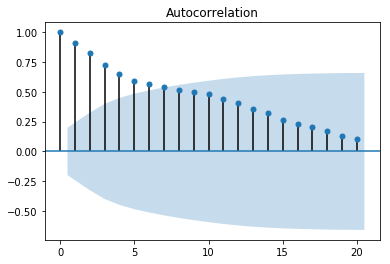

In [0]:
plot_acf(s1, lags=20)
plt.show()

### Partial Auto-Correlation Function (PACF)

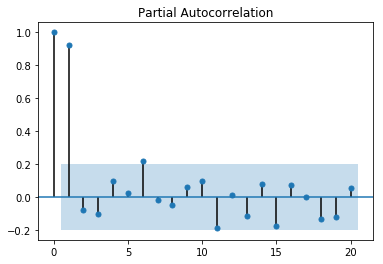

In [0]:
plot_pacf(s1, lags=20)
plt.show()

### Decomposition

In [0]:
result = seasonal_decompose(s1, model='multiplicative')
result.plot()
plt.show()

AttributeError: ignored

In [0]:
pd.date_range('2014-10-10','2016-01-07', 
              freq='MS').strftime("%Y-%b").tolist()

['2014-Nov',
 '2014-Dec',
 '2015-Jan',
 '2015-Feb',
 '2015-Mar',
 '2015-Apr',
 '2015-May',
 '2015-Jun',
 '2015-Jul',
 '2015-Aug',
 '2015-Sep',
 '2015-Oct',
 '2015-Nov',
 '2015-Dec',
 '2016-Jan']